# 用线性回归模型或者lightGBM预测前10天的新增

In [6]:
#
import os
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
#import xgboost as xgb
from lightgbm import LGBMRegressor 
import time
import warnings
from math import sqrt
from matplotlib import pyplot
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
warnings.filterwarnings("ignore")

In [7]:
#训练数据给的是5.1到6.29日
train_dataA=pd.read_csv('dataset/features/features_A.csv')
train_dataB=pd.read_csv('dataset/features/features_B.csv')
train_dataC=pd.read_csv('dataset/features/features_C.csv')
train_dataD=pd.read_csv('dataset/features/features_D.csv')
train_dataE=pd.read_csv('dataset/features/features_E.csv')
train_dataF=pd.read_csv('dataset/features/features_F.csv')
train_dataG=pd.read_csv('dataset/features/features_G.csv')
train_dataH=pd.read_csv('dataset/features/features_H.csv')
train_dataI=pd.read_csv('dataset/features/features_I.csv')
train_dataJ=pd.read_csv('dataset/features/features_J.csv')
train_dataK=pd.read_csv('dataset/features/features_K.csv')
train_dic={'A':train_dataA,'B':train_dataB,'C':train_dataC,'D': train_dataD,'E':train_dataE,
        'F':train_dataF, 'G':train_dataG,'H':train_dataH,'I': train_dataI,'J':train_dataJ,'K':train_dataK}
def clear_data(df):
    return df.drop(['humidity','wind_force','wind_direction',
                    'wind_speed','weather_type','temperature','ext_transfer','iner_transfer','density','migration'],axis=1)
train_data={}
for city_id in ['A','B','C','D','E','F','G','H','I','J','K']:
    train_data[city_id]=clear_data(train_dic[city_id])

In [14]:
model_lgbm = LGBMRegressor(n_estimators=10, metric='mae', random_state=2020, min_child_samples=5, min_child_weight=0.000001)

20
0 [1.1630637575897458, 0.8262339791150537, 0.1280203092202461, 0.5877569624775356, 0.3569019914685707]


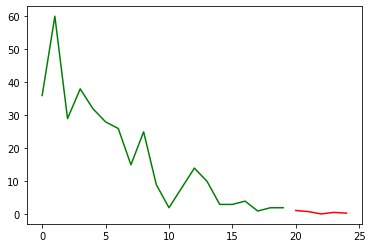

20
1 [-0.5360696572122601, 0.06932530382657154, 0.8254138500336998, -0.7265876260858046, 0.9343476992426083]


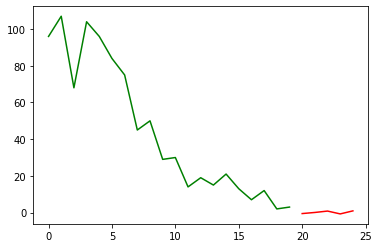

20
2 [2.9738266986329904, 2.169007578001844, 1.908433712444653, 2.218830446104497, 1.8906859683859731]


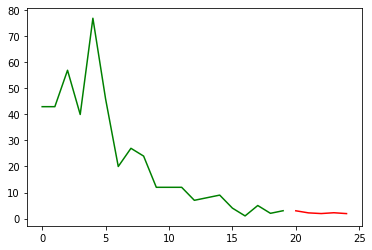

20
3 [-0.3840740846644606, -0.4931463724959608, -0.5776785961163424, -1.1049303329735127, -1.0397817108602343]


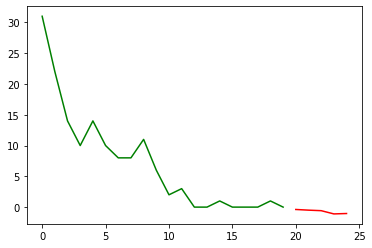

20
4 [0.4561707300123227, 0.05640493582756883, 0.2776272554578738, 0.45377646847466685, 0.2801307347601811]


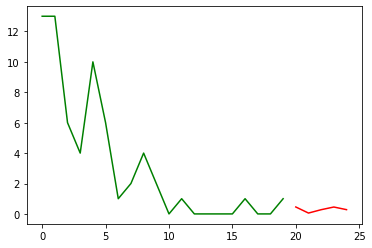

20
5 [-1.142495978987026, -4.369829913750464, -4.362055104216195, -3.210539905540645, -6.2637667255680824]


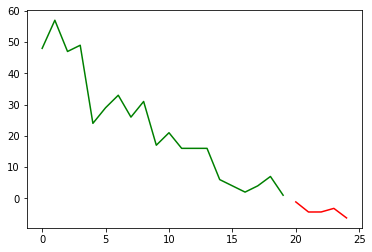

20
6 [-0.08070646068800258, -3.040029591394114, -2.055033922779129, -1.835462245346338, -2.8839704291170114]


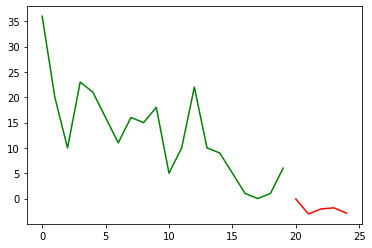

20
7 [-1.8492525796150954, -2.7761331852345545, -5.120100735695148, -3.1599755731021464, -4.292086169832588]


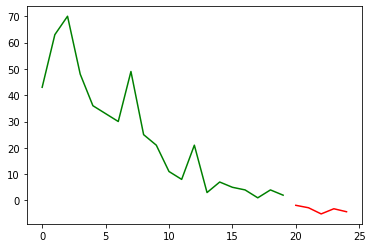

20
8 [-3.4473919376821716, -4.324921190816133, -2.8908350517130916, -3.0676771207531988, -4.584489677884221]


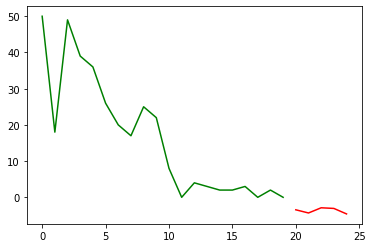

20
9 [-0.7876331241720327, -0.10311320993190742, -0.8704252339885387, -1.9520214729244794, -2.5342591713832623]


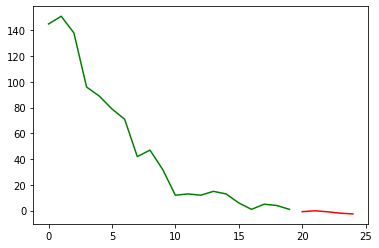

20
10 [5.168863811368173, 1.7599648964449877, 2.845526698365605, 3.6914231447429104, 3.0770519136658567]


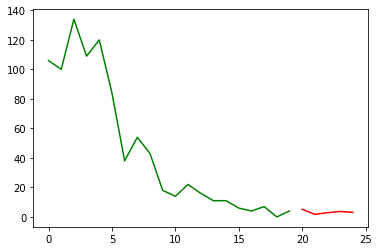

20
11 [-1.1969135096045376, -2.2588257376744263, -1.5427771145544291, -2.484551584133704, -3.9222692246298214]


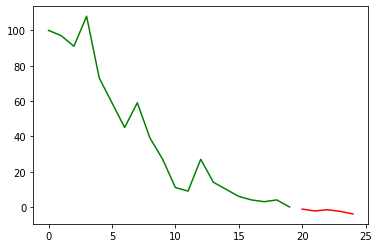

20
12 [6.49901547760415, 3.580210116941288, -0.340340686180463, -3.8014214394867327, -6.865435057707551]


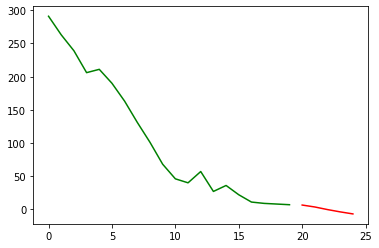

20
13 [0.1880951805981237, -0.880181843870282, -1.57811762520079, -2.1872792188288033, -2.933663655655993]


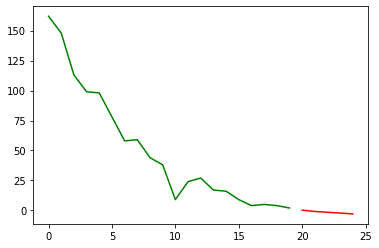

20
14 [7.775213585484075, 4.432743693430956, 4.527444491511597, 5.541712610931638, 5.155775703964151]


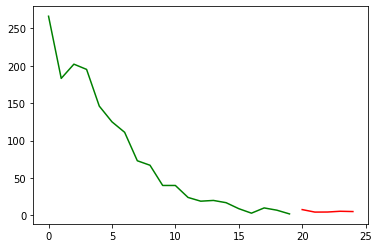

20
15 [3.2297019433257717, 0.7722801438291544, 0.743945144883785, 1.2784673996012357, 0.3646554431401947]


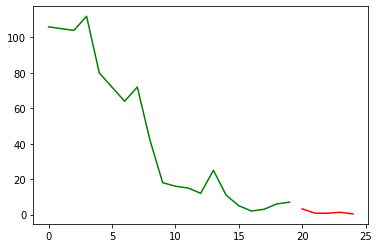

20
16 [1.308949655126301, 1.3745170490523093, 1.047726213679476, 1.5236905004427044, 1.1801572526822484]


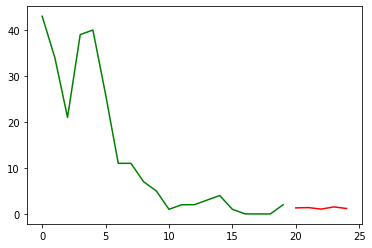

20
17 [5.554104317625811, 2.699207520985933, 2.5575246957952276, 3.657048421618909, 2.458534215046428]


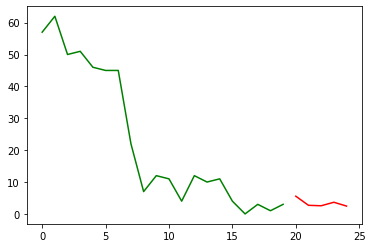

20
18 [-2.258717171352076, -2.1710574600119337, -0.16915633466848545, -1.0957838991598527, -3.05311999171907]


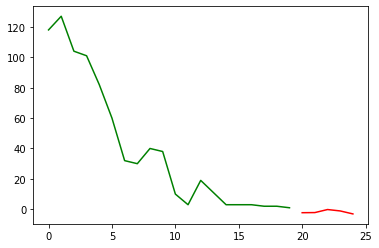

20
19 [0.9595440989181281, 2.7743416104286194, 0.7316254952298062, -0.4154712748673397, -2.064802934635553]


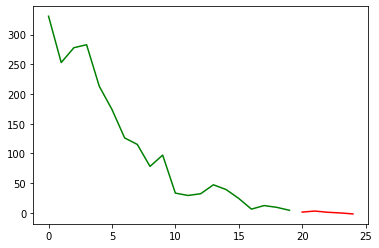

20
20 [6.371359879887532, 0.6275859708802984, 2.7889592107291383, -0.8852502258979292, 2.207929761516389]


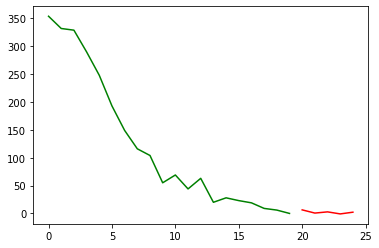

20
21 [0.29352820735192964, -4.919689084109881, -2.210167056265295, -2.6624897921013826, -6.250113740233716]


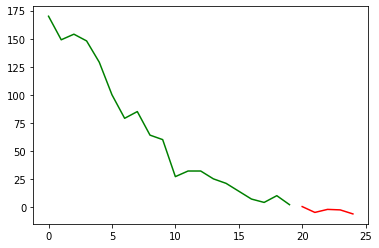

20
22 [0.9215191343889138, 0.4233136141025493, 0.6774988085464888, -0.4857237011232071, -0.771569728313138]


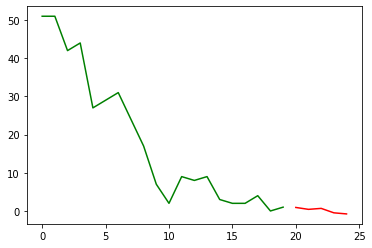

20
23 [5.209009045988936, 1.306479472903582, -0.1699465905869113, -0.48795720688468114, -1.1468347919590658]


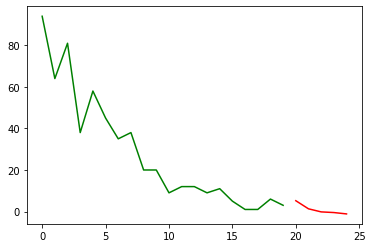

20
24 [0.6960276429968133, 2.5805516026655058, 1.8204990037490185, 1.5595671144233354, 1.6445874291751617]


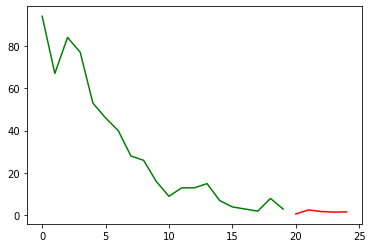

20
25 [4.078754260561134, 4.947736463164676, 3.593501483178227, 2.7945177087160857, 1.6922669673736768]


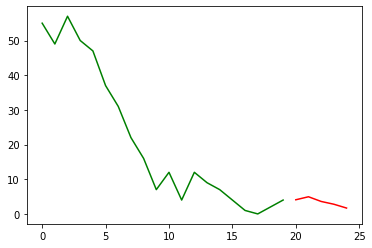

20
26 [1.7210690172810703, -0.6440676121799878, -0.6513466613784553, -2.0903589136543506, -0.7049919206305953]


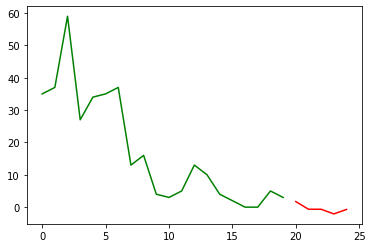

20
27 [-1.4434353426365814, -0.1972856501420761, 1.0215558159420048, -1.1114152098026373, -4.033124116683719]


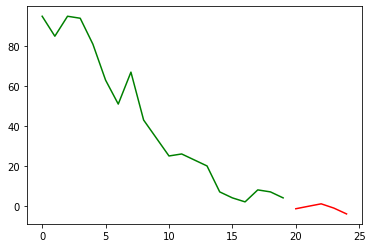

20
28 [-0.6087525130941018, -0.04889176915798754, -0.14356341058702754, -0.36520326146805043, -0.37504733989656114]


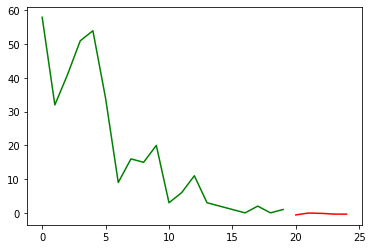

20
29 [3.9845008702437528, 3.6756316745627564, 3.9795364019788315, 4.0656209528290015, 4.015257536305151]


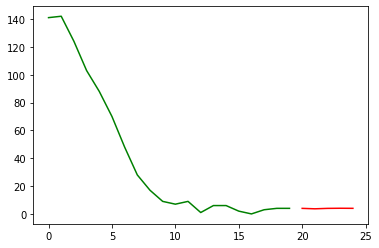

20
30 [3.8795267243743363, 4.905279844240395, 3.933805151175804, 4.648801862645615, 3.9968277218953716]


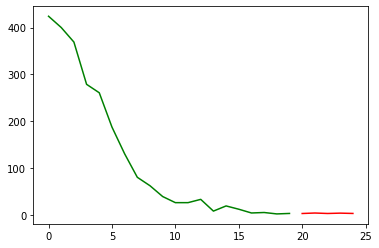

20
31 [9.953166269183026, 10.359967518313791, 10.704594869079163, 11.712887626385083, 13.236467609422398]


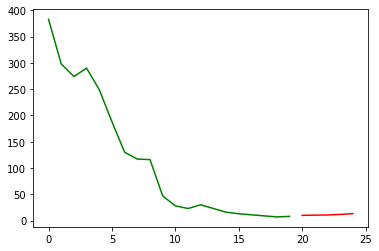

20
32 [2.1353309231723205, 0.9453577460402607, -0.9761861498629982, -0.10883215497739251, -1.4503603364593687]


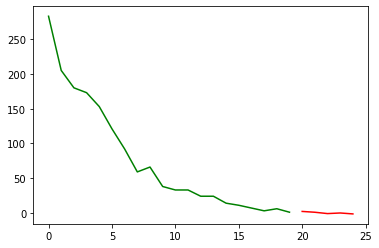

20
33 [2.3407021103179924, 1.0025620560298385, 2.6400351523060546, 2.8728709077934593, 2.817281754330386]


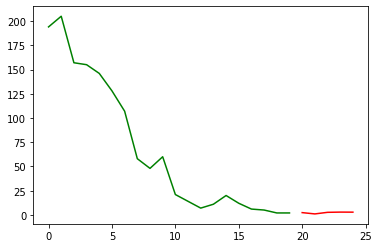

20
34 [1.781103547604979, 1.518976769647495, 1.5432859896514435, 1.36167527628292, 1.545686626219567]


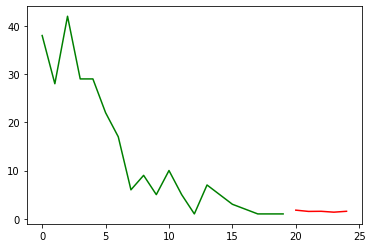

20
35 [2.0970827539882686, 1.3233279479017304, 0.7777310475705814, 0.3025945023320511, 0.014254362317566938]


KeyboardInterrupt: 

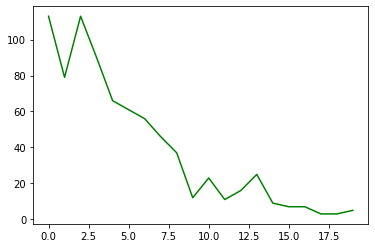

In [16]:
def reserve_target(data,index):
    max_id=data.index(max(data))
    if max_id==len(data)-1:#最后一个点为最大值
        return list(index)
    else:
        return list(index[max_id:])
#保留最大值往后的值
for city_id in ['A','B','C','D','E','F','G','H','I','J','K']:
    grouped=train_data[city_id].groupby('region_id')
    reserve_list=[]
    for ciy_id,group in grouped:
        reserve_list+=reserve_target(list(group['index'].values),group.index)
    train_data[city_id]=train_data[city_id].loc[reserve_list].reset_index(drop=True)
def calculate_lag(df, lag_list, column):
    for lag in lag_list:
        column_lag = column + "_" + str(lag)
        df[column_lag] = df[column].shift(lag, fill_value=0)
    return df

def calculate_trend(df, lag_list, column):
    for lag in lag_list:
        trend_column_lag = "Trend_" + column + "_" + str(lag)
        df[trend_column_lag] = (df[column].shift(0, fill_value=0) - 
                                df[column].shift(lag, fill_value=0))/df[column].shift(lag, fill_value=0.001)
    return df

def get_feature(df):
    df = calculate_lag(df, range(1,7), 'index')
    #all_data = calculate_lag(all_data, range(1,7), 'migration')
    df = calculate_trend(df, range(1,7), 'index')
    #all_data = calculate_trend(all_data, range(1,7), 'migration')
    df.replace([np.inf, -np.inf], 0, inplace=True)
    df.fillna(0, inplace=True)
    return df
def get_test(train_df):
    test_data=train_df[-1:].reset_index(drop=True)
    last_raw=train_df[-1:].reset_index(drop=True)
    pres1=['index_'+str(i) for i in range(1,7)]
    pres2=['Trend_index_'+str(i) for i in range(1,7)]
    test_data.loc[0,'index_1']=last_raw.loc[0,'index']
    for i in range(len(pres1)-1):
        test_data.loc[0,pres1[i+1]]=last_raw.loc[0,pres1[i]]
    test_data.loc[0,'Trend_index_1']=1
    for i in range(len(pres2)-1):
        test_data.loc[0,pres2[i+1]]=last_raw.loc[0,pres2[i]]
    X_test=test_data.drop(['index'],axis=1)
    return X_test
pre_lens=5
pre_dicSeir={}
for city_id in ['A','B','C','D','E','F','G','H','I','J','K']:
    grouped=train_data[city_id].groupby('region_id')
    reserve_list=[]
    pre_dic={}
    for region_id,group in grouped:
        group=group[-20:].reset_index(drop=True)
        group=group.drop(['date','city','region_id'],axis=1)
        print(len(group))
        pyplot.plot(group.values,'green')
        pres=[]
        for i in range(pre_lens):
            #print(len(group))
            train_df=get_feature(group)
            X_train=train_df.drop(['index'],axis=1)
            Y_train=train_df['index']
            X_test=get_test(train_df)
            regr = linear_model.LinearRegression()#线性回归模型，可选树模型
            model_choose=regr
            model_choose.fit(X_train, Y_train)
            y_pred = model_choose.predict(X_test)
            raw={'index':y_pred[0]}
            pres.append(y_pred[0])
            group=group.append(raw,ignore_index=True)
        print(region_id,pres)
        pre_dic.update({region_id:pres})
        pyplot.plot([i for i in range(len(group)-len(pres),len(group))],pres, color='red')
        save_dir='AR_fit_city_lgb/'+city_id
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir,str(region_id)+'.png'))
        pyplot.show()
        pyplot.close()
    pre_dicSeir.update({city_id:pre_dic})

In [19]:
import pandas as pd
re_sub=pd.read_csv('submits/submission1_16.csv',header=None)
re_sub.columns = ['city','region_id','date', 'index']
import random
tmp_list=[]
ex={'A':[],'C':[],'I':[8],'J':[3],'K':[0]}
def convert_date(date):
    if date==21200630:
        return 0
    else:
        return date-21200700
for num,city,region_id,date,value in re_sub.itertuples():
    if date<21200702:
        if city in ['A','C','I','J','K']:
            replace_lgb=pre_dicSeir[city][region_id][convert_date(date)]
            if replace_lgb<0:
                replace_lgb=0
            if region_id not in ex[city]:
                re_sub.loc[num,'index']=int(np.ceil(replace_lgb))
            #re_sub.loc[num,'index']=int(np.ceil(replace_lgb))
re_sub.to_csv('submits/submission7_23v1.csv',index=False,header=None)
re_sub.head(2)

KeyError: 'A'